In [69]:
%matplotlib inline

import pickle
import collections
import os, random
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import random
import math
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

dataPath = '../PedestrianData/IntentionData'
pd.__version__

'0.24.2'

#### Loading the demographic and environmental data from pickle:

In [70]:
data = pd.read_pickle('../PedestrianData/Rafael.pkl')

#### Removing folder names from file values (some files are in subfolders)
#### Cleasing data that contain errors

In [71]:
for i in range(len(data)):
    value = data['File'].values[i].split('/')
    data['File'].values[i] = value[len(value) - 1]
    data['Wait Time (s)'] == "Err2"
    
data = data[data['Wait Time (s)'] != "Err1"]
data = data[data['Wait Time (s)'] != "Err2"]
data = data[data['Wait Time (s)'] != "Err3"]
data = data[data['Wait Time (s)'] != "Err4"]
data = data[data['Wait Time (s)'] != "Err5"]
data = data[data['Wait Time (s)'] != 0]
    
data.shape

(3410, 65)

### Reading three sample trials

In [94]:
while True:
    file1 = random.choice(os.listdir(dataPath))    
    file2 = random.choice(os.listdir(dataPath))    
    file3 = random.choice(os.listdir(dataPath))    
    if (data.loc[data['File'] == file1]['Wait Time (s)'].empty
        or data.loc[data['File'] == file2]['Wait Time (s)'].empty
       or data.loc[data['File'] == file3]['Wait Time (s)'].empty):
        continue
    else:
        break

crossTime1 = data.loc[data['File'] == file1]['Wait Time (s)']
crossTime2 = data.loc[data['File'] == file2]['Wait Time (s)']
crossTime3 = data.loc[data['File'] == file3]['Wait Time (s)']

width1 = data.loc[data['File'] == file1]['Lane Width']
width2 = data.loc[data['File'] == file2]['Lane Width']
width3 = data.loc[data['File'] == file3]['Lane Width']

if(data.loc[data['File'] == file1]['One way'].item() == 1):
    lane1 = 'One Way'
else:
    lane1 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane2 = 'One Way'
else:
    lane2 = "Two Way"
    
if(data.loc[data['File'] == file2]['One way'].item() == 1):
    lane3 = 'One Way'
else:
    lane3 = "Two Way"

print(dataPath + '/' + file1)
df1 = pd.read_csv(dataPath + '/' + file1, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                       ])
df2 = pd.read_csv(dataPath + '/' + file2, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])
df3 = pd.read_csv(dataPath + '/' + file3, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"
                       ])

../PedestrianData/IntentionData/25--2018-07-7--11-16-50.txt


## Visualizing gaze directions over time 

The figure shows a respondent at their starting point (y = ~653) in the virtual environment and walking across the virtual road as y approaches ~649

Arrows show the 2D direction that the respondent was facing at that time.

SOUTH faces the other side of the road in the virtual reality environment.

25--2018-07-7--11-16-50.txt
8--2018-07-7--16-12-26.txt
27--2018-08-5--17-27-26.txt


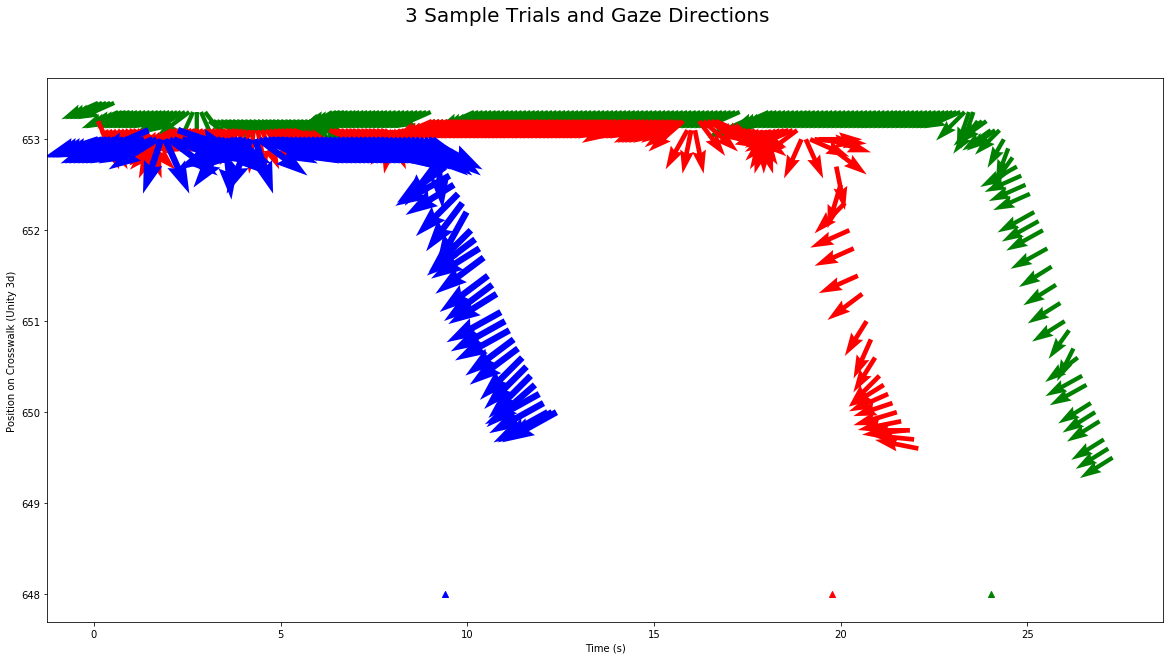

SOUTH faces the other side of the road


In [95]:
data_x = [crossTime1.tolist()[0], crossTime2.tolist()[0], crossTime3.tolist()[0]]
data_y = [648, 648, 648]
#plt.plot(data_x, data_y, 'or')

print(file1)
print(file2)
print(file3)
plt.figure(figsize=(20,10))
plt.quiver(df1["Time"], df1["Pos_z"], df1["Gaz_x"], df1["Gaz_z"], color='g')
plt.quiver(df2["Time"], df2["Pos_z"], df2["Gaz_x"], df2["Gaz_z"], color='r')
plt.quiver(df3["Time"], df3["Pos_z"], df3["Gaz_x"], df3["Gaz_z"], color='b')

plt.scatter(crossTime1, 648, marker='^', color='g')
plt.scatter(crossTime2, 648, marker='^', color='r')
plt.scatter(crossTime3, 648, marker='^', color='b')

plt.xlabel("Time (s)")
plt.ylabel("Position on Crosswalk (Unity 3d)")
plt.suptitle('3 Sample Trials and Gaze Directions', fontsize=20)

plt.show()

print("SOUTH faces the other side of the road")

### Normalized histograms of the discretized directions for head poses and changes
- Includes lane type and width
    - Note difference between One Way and Two Way cases

Green - 3.0 meter lanes - Two Way
Red - 3.0 meter lanes - One Way
Blue - 3.0 meter lanes - One Way


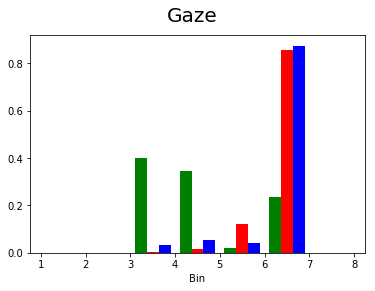

In [74]:
plt.hist([df1["Gaz_Bin"], df2["Gaz_Bin"], df3["Gaz_Bin"]], bins=[1, 2, 3, 4, 5, 6, 7, 8], density=True, color=["green", "red", "blue"])

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Gaze", fontsize=20)
plt.xlabel("Bin")
plt.show()

Green - 3.0 meter lanes - One Way
Red - 3.0 meter lanes - Two Way
Blue - 2.75 meter lanes - Two Way


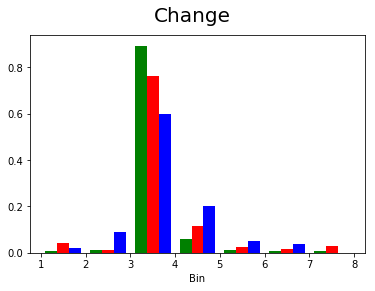

In [10]:
plt.hist([df1["Chg_Bin"], df2["Chg_Bin"], df3["Chg_Bin"]], bins=[1, 2, 3, 4, 5, 6, 7, 8], density=True, color=["green", "red", "blue"])

print("Green - " + str(width1.values[0]) + " meter lanes - " + lane1)
print("Red - " + str(width2.values[0]) + " meter lanes - " + lane2)
print("Blue - " + str(width3.values[0]) + " meter lanes - " + lane3)
plt.suptitle("Change", fontsize=20)
plt.xlabel("Bin")
plt.show()

## Curating final dataset which includes [crossTime, gazeBin, changeBin]
#### gazeBin and changeBin are the histograms of head pose/change

In [11]:
files = os.listdir(dataPath)
bin_data = np.empty((len(files), 3), dtype=list)
for i in range(len(files)):
    count = 0
    file = dataPath + "/" + files[i]
    df = pd.read_csv(file, sep=",", header=None, 
                 names=["Time", 
                        "Pos_x", "Pos_y", "Pos_z", 
                        "Gaz_x", "Gaz_y", "Gaz_z", 
                        "Vel_x", "Vel_z",
                        "Acc_x", "Acc_z",
                        "Vel_Mag", "Acc_Mag",
                        "Vel_Ang", "Acc_Ang", "Gaz_Ang",
                        "Vel_Bin", "Acc_Bin", "Gaz_Bin", "Chg_Bin"          
                       ])
    try:
        bin_data[i, 0] = (data.loc[data['File'] == files[i]])["Wait Time (s)"].item()
    except:
        bin_data[i, 0] = 0
    finally:
        bin_data[i, 1] = np.asarray(df["Gaz_Bin"])
        bin_data[i, 2] = np.asarray(df["Chg_Bin"])
        
# Removing data with crossing time of '0'
bin_data = bin_data[bin_data[:, 0] != 0]

# Validating data types in the dataset
np.unique([str(datum.dtype) for datum in bin_data[:,1]])

array(['int64'], dtype='<U5')

# Testing regression models

### Decision Tree

In [91]:
def getData(N):
    x,y =[],[]
    for i in range(N):  
        a = np.histogram(bin_data[i,1], bins=[1, 2, 3, 4, 5, 6, 7, 8])[0]
        yy = bin_data[i, 0]
        x.append(a)
        y.append(yy)
    return np.array(x), np.array(y)

X,y=getData(len(bin_data))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)  

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

print("Trained with: ", len(X_train))
print("Tested with: ", len(X_test))
print('R^2 (coefficient of determination) regression score function:', metrics.r2_score(y_test,y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

x_ax=range(len(y_pred))
plt.figure(figsize=(15, 10)) 
plt.scatter(x_ax, y_test, s=5, color="green", label="original")
plt.scatter(x_ax, y_pred, lw=1.5, color="red", label="predicted")
    
plt.xlabel("Trial #")
plt.ylabel("Time of Cross (s)")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-91-878abeea1fb7>, line 31)

In [77]:
np.histogram(bin_data[123,1], bins=[1, 2, 3, 4, 5, 6, 7, 8], density=True)[0]

array([0.        , 0.        , 0.10179641, 0.05988024, 0.22155689,
       0.56287425, 0.05389222])

In [ ]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)